In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Informe

**Se elige el dataset de UCI Estimation of obesity levels based on eating habits and physical condition Data Set. Kaggle indica que ya se encuentra en su base de datos y, por lo tanto, se utiliza el disponible en la plataforma.**

In [ ]:
my_df = pd.read_csv('../input/obesitydata/ObesityDataSet_raw_and_data_sinthetic.csv')
my_df

In [ ]:
# El nombre de las columnas es el siguiente:
my_df.columns

In [ ]:
# Visualización del tipo de variables
my_df.dtypes

**Posee variables categóricas. Los registros son reemplazados por números, según la siguiente descripción:**

In [ ]:
# comprobación de valores perdidos en las variables.
my_df.isnull().sum()

# **Attribute Information:**

Questions	Possible Answers
1) ¿What is your gender? [Gender]	
•
Female = 0, Male =1

2) ¿what is your age? [Age]	Numeric value	
3) ¿what is your height? [Height]	Numeric value in meters	
4) ¿what is your weight? [Weight]	Numeric value in kilograms	
5) ¿Has a family member suffered or suffers from overweight? [family_history_with_overweight]	
•
Yes =1, No = 1

6) ¿Do you eat high caloric food frequently? [FAVC]	
•
Yes = 1, No = 0

7) ¿Do you usually eat vegetables in your meals? [FCVC]	
•
Never = 0, Sometimes =1, Always = 2

8) Number of main meals [NCP]	 Numeric value

9) ¿Do you eat any food between meals? [CAEC]	
•
No = 0, Sometimes = 1, Frequently = 2, Always = 3

10) ¿Do you smoke? [Smoke]	
•
Yes = 1, No = 0

11) ¿How much water do you drink daily? [CH2O]	
•
Less than a liter = 0, Between 1 and 2 L = 1, More than 2 L = 2

12) ¿Do you monitor the calories you eat daily? [SCC]	
•
Yes = 1, No = 0

13) ¿How often do you have physical activity? [FAF]	
•
I do not have = 0, 1 or 2 days = 1, 2 or 4 days = 2, 4 or 5 days = 3

14) ¿How much time do you use technological devices such as cell phone, videogames, television, computer and others? [TUE)	
•
0–2 hours = 0, 3–5 hours = 1, More than 5 hours = 2

15) ¿how often do you drink alcohol? [CALC]	
•
I do not drink = 0, Sometimes = 1, Frequently = 2, Always = 3

16) ¿Which transportation do you usually use? [MTRANS]	
•
Automobile = 0, Motorbike = 1, Bike = 2, Public Transportation = 3, Walking = 4
17) BMI 	 Numeric value

**Variables categóricas se pasan a numéricas.**

In [ ]:
print(my_df.Gender.value_counts())
my_df['Gender'] = my_df['Gender'].replace('male', 1)
my_df['Gender'] = my_df['Gender'].replace('female', 0)
print(my_df.Gender.value_counts())

In [ ]:
print(my_df.family_history_with_overweight.value_counts())
my_df['family_history_with_overweight'] = my_df['family_history_with_overweight'].replace('yes', 1)
my_df['family_history_with_overweight'] = my_df['family_history_with_overweight'].replace('no', 0)
print(my_df.family_history_with_overweight.value_counts())

In [ ]:
print(my_df.FAVC.value_counts())
my_df['FAVC'] = my_df['FAVC'].replace('yes', 1)
my_df['FAVC'] = my_df['FAVC'].replace('no', 0)
print(my_df.FAVC.value_counts())

In [ ]:
print(my_df.FCVC.value_counts())
my_df['FCVC'] = my_df['FCVC'].replace('always', 2)
my_df['FCVC'] = my_df['FCVC'].replace('sometimes', 1)
my_df['FCVC'] = my_df['FCVC'].replace('never', 0)
print(my_df.FCVC.value_counts())

In [ ]:
print(my_df.CAEC.value_counts())
my_df['CAEC'] = my_df['CAEC'].replace('always', 3)
my_df['CAEC'] = my_df['CAEC'].replace('frequently', 2)
my_df['CAEC'] = my_df['CAEC'].replace('sometimes', 1)
my_df['CAEC'] = my_df['CAEC'].replace('no', 0)
print(my_df.CAEC.value_counts())

In [ ]:
print(my_df.SMOKE.value_counts())
my_df['SMOKE'] = my_df['SMOKE'].replace('yes', 1)
my_df['SMOKE'] = my_df['SMOKE'].replace('no', 0)
print(my_df.SMOKE.value_counts())

In [ ]:
print(my_df.CH2O.value_counts())
my_df['CH2O'] = my_df['CH2O'].replace('more than 2 l', 2)
my_df['CH2O'] = my_df['CH2O'].replace('between 1 and 2 l', 1)
my_df['CH2O'] = my_df['CH2O'].replace('less than a liter', 0)
print(my_df.CH2O.value_counts())

In [ ]:
print(my_df.SCC.value_counts())
my_df['SCC'] = my_df['SCC'].replace('yes', 1)
my_df['SCC'] = my_df['SCC'].replace('no', 0)
print(my_df.SCC.value_counts())

In [ ]:
print(my_df.FAF.value_counts())
my_df['FAF'] = my_df['FAF'].replace('4 to 5', 3)
my_df['FAF'] = my_df['FAF'].replace('2 to 4', 2)
my_df['FAF'] = my_df['FAF'].replace('1 to 2', 1)
print(my_df.FAF.value_counts())

In [ ]:
print(my_df.TUE.value_counts())
my_df['TUE'] = my_df['TUE'].replace('>5', 2)
my_df['TUE'] = my_df['TUE'].replace('3 to 5', 1)
my_df['TUE'] = my_df['TUE'].replace('0 to 2', 0)
print(my_df.TUE.value_counts())

In [ ]:
print(my_df.CALC.value_counts())
my_df['CALC'] = my_df['CALC'].replace('always', 3)
my_df['CALC'] = my_df['CALC'].replace('frequently', 2)
my_df['CALC'] = my_df['CALC'].replace('sometimes', 1)
my_df['CALC'] = my_df['CALC'].replace('no', 0)
print(my_df.CALC.value_counts())

In [ ]:
print(my_df.MTRANS.value_counts())
my_df['MTRANS'] = my_df['MTRANS'].replace('walking', 4)
my_df['MTRANS'] = my_df['MTRANS'].replace('public_transportation', 3)
my_df['MTRANS'] = my_df['MTRANS'].replace('bike', 2)
my_df['MTRANS'] = my_df['MTRANS'].replace('motorbike', 1)
my_df['MTRANS'] = my_df['MTRANS'].replace('automobile', 0)
print(my_df.MTRANS.value_counts())

In [ ]:
print(my_df.NObeyesdad.value_counts())
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('obesity_type_iii', 6)
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('obesity_type_ii', 5)
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('obesity_type_i', 4)
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('overweight_level_ii', 3)
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('overweight_level_i', 2)
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('insufficient_weight', 1)
my_df['NObeyesdad'] = my_df['NObeyesdad'].replace('normal_weight', 0)
print(my_df.NObeyesdad.value_counts())

In [ ]:
# Comprobación
my_df

In [ ]:
# Se elimina la columna de id.
my_df = my_df.drop(columns=['id'])

In [ ]:
# Cambiar el orden de las variables para facilitar la normalización y la posterior generación de un nuevo dataset.
my_df = my_df.reindex(columns=['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'CAEC', 'CH2O', 'FAF', 'TUE', 
       'CALC', 'MTRANS', 'Gender', 'family_history_with_overweight', 
       'FAVC', 'NCP', 'SMOKE', 'SCC', 'NObeyesdad'])
my_df

In [ ]:
# Cambiar el nombre a las columnas, para que sea más fácil analizar los clusters
my_df.set_axis(['Age', 'Height', 'Weight', 'BMI', 'Frequency of consumption of vegetables', 
                                      'Consumption of food between meals', 'Consumption of water daily', 'Physical activity frequency',
                                      'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Gender',
                                      'Familyhistory withoverweight', 'Frequent consumption of high caloric food',
                                      'Number of main meals', 'Smoke', 'Calories consumption monitoring', 'Type of obesity'],
               axis='columns', inplace=True)
my_df

In [ ]:
# Resumen estadístico.
my_df.describe()

* El dataset está equilibrado en cuanto al sexo de los individuos.
* La edad promedio es de adulto joven. Así como el 75% de la muestra, aunque en el valor mínimo se detecta un adolescente y, en el máximo, una persona adulta mayor.
* El promedio de la muestra está en el rango de sobrepeso.
* El 25% de la muestra se encuentra en un rango de peso normal, sin embargo, el valor mínimo encontrado está en el rango de peso insuficiente.

In [ ]:
# Eliminación de las variables consideradas irrelevantes para el análisis (se tomó la decisión después de realizar el análisis clústering y con la información disponible sobre factores que influyen en la obesidad)
# Con esto se disminuye el número de variables (especialmente porque las categóricas son la mayor parte) y se facilita el proceso de análisis.
column = ['Calories consumption monitoring', 'Number of main meals', 'Time using technology devices']
my_df = my_df.drop(columns=column)
my_df

In [ ]:
my_df.info()

In [ ]:
# Cambiar tipo de dato en variable 'Physical activity frequency'
my_df['Physical activity frequency']=my_df['Physical activity frequency'].astype('int')
my_df.info()

In [ ]:
# Código de normalización

ClusterDF = my_df.iloc[:,:10]
dataClust = np.asarray(ClusterDF)
means = np.mean(dataClust, axis=0)
stds = np.std(dataClust, axis=0)
dataClust = (dataClust - means)/stds
dataClust

In [ ]:
# Comprobación de la normalización de los datos
print('Media datos =',np.mean(dataClust))
print('Desviación típica datos =', np.std(dataClust))

In [ ]:
# Columnas sin normalizar, que corresponden a las variables dicotómicas o binarias.
columnas_s_norm = my_df.iloc[:,10:-1]
data_s_norm = np.asarray(columnas_s_norm)
data_s_norm

In [ ]:
# Concatenar ambos array
DFclust = np.concatenate((dataClust, data_s_norm), axis=1)
DFclust

In [ ]:
my_df.columns

In [ ]:
# Convertir el array anterior en dataframe pandas
DF = pd.DataFrame(DFclust, columns = ['Age', 'Height', 'Weight', 'BMI',
       'Frequency of consumption of vegetables',
       'Consumption of food between meals', 'Consumption of water daily',
       'Physical activity frequency', 'Consumption of alcohol',
       'Transportation used', 'Gender', 'Familyhistory withoverweight',
       'Frequent consumption of high caloric food', 'Smoke'])
DF

Ambos dataset coinciden y contienen las columnas normalizadas y las sin normalizar. Dataframe a utilizar es DF.

# 1. Usar el algoritmo k-means, haciendo propuesta de número de clusters a utilizar mediante, por poner un ejemplo, la regla del codo vista en teoría. Justificad el número de clusters escogido. Podemos trabajar con los algoritmos de Clustering proporcionados por la librería sklearn de Python.

In [ ]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans =KMeans(n_clusters=k).fit(DF)
    sse.append(kmeans.inertia_)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Por este método se estima un número de 3 cluster, por el codo que se genera en esa zona. Sin embargo, no queda claro con este método.

Este método sugiere que el K sea de 3.

In [ ]:
# Código para obtener el Silhouette score y graficarlo
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

x = DF.iloc[:,:].values

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    plt.show()


Por el coeficiente de silueta, el valor de K estaría entre los números 4, 9 y 10. 

# **Se generan y analizan las dos opciones de K, 3 y 4.**

In [ ]:
# Aplicación del algoritmo K-Means con k=3
kmeans = KMeans(n_clusters=3).fit(DF)
centroids = kmeans.cluster_centers_

In [ ]:
dfclust=pd.DataFrame(data=kmeans.cluster_centers_)
dfclust.columns=DF.columns
dfclust

In [ ]:
# Adicionar la columna cluster al DF
my_df["Cluster"]=kmeans.labels_
my_df["Cluster"].value_counts()

In [ ]:
my_df

In [ ]:
# Cluster 1
my_df[my_df.Cluster==0].mean(axis=0)

In [ ]:
# Cluster 2
my_df[my_df.Cluster==1].mean(axis=0)

In [ ]:
# Cluster 3
my_df[my_df.Cluster==2].mean(axis=0)

In [ ]:
# Análisis con PCA
import matplotlib
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transform = pca.fit_transform(DF)
colors = ['red','green','blue','yellow']

In [ ]:
 pca.explained_variance_ratio_

In [ ]:
plt.scatter(transform[:,0],transform[:,1],c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors))

Se observa una buena separación de los cluster.

**K-means con 4 clusters.**

In [ ]:
# Aplicación del algoritmo K-Means con k=4
kmeans = KMeans(n_clusters=4).fit(DF)
centroids = kmeans.cluster_centers_

In [ ]:
dfclust=pd.DataFrame(data=kmeans.cluster_centers_)
dfclust.columns=DF.columns
dfclust

# **Se observan diferencias notorias entre los distintos cluster, como el BMI, Consumption of food between meals, Transportation used, entre otros.**
**ANÁLISIS MÁS ABAJO**

In [ ]:
# Adicionar la columna cluster
my_df["Cluster"]=kmeans.labels_
my_df["Cluster"].value_counts()

In [ ]:
# Cluster 1
my_df[my_df.Cluster==0].mean(axis=0)

In [ ]:
# Cluster 2
my_df[my_df.Cluster==1].mean(axis=0)

In [ ]:
# Cluster 3
my_df[my_df.Cluster==2].mean(axis=0)

In [ ]:
# Cluster 4
my_df[my_df.Cluster==3].mean(axis=0)

In [ ]:
# Análisis con PCA
import matplotlib
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transform = pca.fit_transform(DF)
colors = ['red','green','blue','yellow']

In [ ]:
 pca.explained_variance_ratio_

In [ ]:
plt.scatter(transform[:,0],transform[:,1],c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors))

**En el PCA, se observa mayor superposición que lo evidenciado con el k=3.**

**Al generar 4 cluster, se pueden identificar mayores diferencias que explican el outcome. 
Aunque en la gráfica de cluster con PCA, se observa que hay una mejor separación de cluster con 3.**

# 2. Usar el algoritmo G-means, comparando el resultado con el caso anterior. Discutid lo observado y razonad qué opción quereis mantener en el resto de este ejercicio.

In [ ]:
!pip install pyclustering

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans
from pyclustering.cluster.encoder import type_encoding, cluster_encoder

In [ ]:
# Se prueba el algoritmo con hasta 500 cluster y se obtienen 500. Por lo tanto, de esa manera el algoritmo no aporta información relevante.
# Por lo tanto, se prueba el algoritmo con 4 cluster.
gmeansSets = gmeans(dataClust,k_max=4).process()
clustersGmeans = gmeansSets.get_clusters()
centersGmeans = gmeansSets.get_centers()

In [ ]:
encoder = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clustersGmeans, dataClust)
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
gmeansLabels = encoder.get_clusters()
print(gmeansLabels)   # Display labels

In [ ]:
# Adicionar label en el DF.
my_df["ClusterGMEANS"]=gmeansLabels
my_df.ClusterGMEANS.value_counts()

In [ ]:
np.sort(my_df.ClusterGMEANS.unique())

In [ ]:
my_df

In [ ]:
# Cluster 1
my_df[my_df.ClusterGMEANS==0].mean(axis=0)

In [ ]:
# Cluster 2
my_df[my_df.ClusterGMEANS==1].mean(axis=0)

In [ ]:
# Cluster 3
my_df[my_df.ClusterGMEANS==2].mean(axis=0)

In [ ]:
# Cluster 4
my_df[my_df.ClusterGMEANS==3].mean(axis=0)

In [ ]:
sil_coeff = silhouette_score(dataClust, gmeansLabels, metric='euclidean')
sil_coeff

**No se observan diferencias notorias entre los cluster generados con el modelo G-Means, en comparación al modelo K-means, pese a que la silueta es mayor en G-Means. Se opta por utilizar el modelo K-Means con 4 clusters.**

# 3.Una vez escogido el método de Clustering a utilizar, generar de nuevo los clusters y anadir a vuestro data frame un nuevo atributo Cluster donde se indique a que Cluster pertenece cada elemento.

In [ ]:
my_df = my_df.drop(columns = ['ClusterGMEANS'])

In [ ]:
# Esto se realizó anteriormente. Se presenta el dataframe con la variable cluster incorporada.
my_df

# 4. Mostrar los centros de cada cluster y el número de elementos en cada uno de ellos para empezar a discutir las diferencias existentes entre los clusteres.

In [ ]:
# Mostrar los centros
dfclust=pd.DataFrame(data=kmeans.cluster_centers_)
dfclust.columns=DF.columns
dfclust

In [ ]:
# Número de registros en cada cluster
my_df.Cluster.value_counts()

**Elementos de cada cluster en el DF original.**

In [ ]:
# Cluster 1
my_df[my_df.Cluster==0].mean(axis=0)

In [ ]:
# Cluster 2
my_df[my_df.Cluster==1].mean(axis=0)

In [ ]:
# Cluster 3
my_df[my_df.Cluster==2].mean(axis=0)

In [ ]:
# Cluster 4
my_df[my_df.Cluster==3].mean(axis=0)

# 5. Analizar los centros de cada cluster para discernir la influencia de cada atributo sobre la clusterización. Intentad describir qué caracteriza cada cluster. Recordad que los atributos que mejor discriminan son los que hacen que un centroide esté más separado de otro.

In [ ]:
# Mostrar los centros
dfclust=pd.DataFrame(data=kmeans.cluster_centers_)
dfclust.columns=DF.columns
dfclust

**Al analizar los centros:**

* El cluster 1 es el conformado con personas cuyo transporte representa el menor ejercicio físico, como puede ser el utilizar frecuentemente vehículo propio. Es el que tiene mayor representación de hombres.

* El cluster 2 es el conformado por las personas que reportan mayor frecuencia de ejercicio físico y menor consumo de alimentos entre las comidas principales. Existe un leve predominio de hombres y el menos fumador. Es el cluster con el segundo menor BMI, después del cluster 4.

* El cluster 3 corresponde a las personas con mayor índice de masa corporal (BMI), mayormente conformado por mujeres y con mayor historia familiar de sobrepeso y consumo frecuente de comidas con alto contenido calórico.

* El cluster 4 corresponde a las personas que tienen el menor BMI, pero que consumen muchos más alimentos entre las comidas principales. Es el grupo que mayor proporción de mujeres posee. Presentan la menor proporción de personas con historia de sobrepeso y menor consumo diario de agua.

**Al analizar los clusters.**

* Cluster 1: personas adultas muy jóvenes con peso normal, consumo frecuente de alimentos entre comidas, con 65% de mujeres, con el 53% sus integrantes con antecedentes familiares de sobrepeso, se movilizan en transporte público.

* Cluster 2: personas adultas muy jóvenes, con sobrepeso nivel 1, 54,7% hombres, consumen alimento de manera infrecuente entre comidas,se movilizan en transporte público, con un 74% de antecedentes familiares de obesidad.

* Cluster 3: personas adultas jóvenes, con obesidad tipo 2, 55% mujeres, utilizan transporte público, 99% con antecedentes familiares de sobrepeso y consumo frecuente de alimentos con alto contenido calórico.

* Cluster 4: personas adultas, con obesidad tipo 1, 61,7% de mujeres, utilizan automóvil para transportarse,91% con antecedentes familiares de sobrepeso. 

In [ ]:
# Número de registros en cada cluster, de algunas variables.
my_df['Transportation used'].value_counts()

# 6. Dar nombres significativos a los clusters que reflejen los tipos de pacientes.

* Cluster 1: mujeres adultas muy jóvenes con peso normal, que consumen frecuentemente alimentos entre comidas y que se movilizan en transporte público.

* Cluster 2: personas adultas muy jóvenes, con sobrepeso nivel 1, que presentan antecedentes familiares de sobrepeso y se movilizan en transporte público.

* Cluster 3: personas adultas con obesidad nivel 2, con historia familiar de sobrepeso, que consumen frecuentemente comidas con alto contenido calórico y que se movilizan en transporte público.

* Cluster 4: mujeres adultas, con obesidad tipo 1, que presentan antecedentes familiares de sobrepeso y que utilizan automóvil para transportarse.

# Ejercicio 2: Reglas de Asociación

* Utilizando apriori generad el conjunto de items más frecuentes de vuestro dataset. Probad diferentes valores del parámetro max len y discutid los resultados observados.
* Utilizando association rules generad ahora el conjunto de reglas de asociación. Como parámetro metric utilizad lift. Esto es para indicar que vuestra estrategia de búsqueda es el Lift.
* Representad las reglas obtenidas y discutid los resultados observados.
* Siguiendo con el punto anterior, ahora en parámetro min threshold podéis ir ajustando el mínimo valor requerido de Lift para generar las reglas. También podéis ajustar el parámetro min support del apriori utilizado en el punto anterior para crear de nuevo el conjunto de items más frecuentes, y repetir el proceso entero. Probad diferentes casos y discutid las tendencias observadas al modificar las reglas.
* Analizar finalmente las reglas obtenidas indicando los parámetros finalmente utilizados. Extraed conclusiones.

**Algoritmo Apriori**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
my_df

In [ ]:
my_df.info()

In [ ]:
# Variable outcome multiclase se transforma en binaria, por error que arroja el código freqItems = apriori (DiscretizedDF,min_support=0.5,use_colnames=True) (solicita variable binaria)
print(my_df['Type of obesity'].value_counts())
my_df['Type of obesity'] = my_df['Type of obesity'].replace(0, 0)
my_df['Type of obesity'] = my_df['Type of obesity'].replace(1, 0)
my_df['Type of obesity'] = my_df['Type of obesity'].replace(2, 0)
my_df['Type of obesity'] = my_df['Type of obesity'].replace(3, 0)
my_df['Type of obesity'] = my_df['Type of obesity'].replace(4, 1)
my_df['Type of obesity'] = my_df['Type of obesity'].replace(5, 1)
my_df['Type of obesity'] = my_df['Type of obesity'].replace(6, 1)
print(my_df['Type of obesity'].value_counts())
# Después de aplicar este código, funciona el código para freqItems.

In [ ]:
# Discretización de variables.
nbins=5
DiscretizedDF=pd.DataFrame()
DiscretizedDF["Age"], bins = pd.qcut(my_df["Age"], nbins, retbins=True, duplicates= "drop")

# Se elimina BMI, porque en base a él se determina el estado nutricional DiscretizedDF["BMI"], bins = pd.qcut(my_df["BMI"], nbins, retbins=True, duplicates= "drop")
DiscretizedDF["Frequency of consumption of vegetables"], bins = pd.qcut(my_df["Frequency of consumption of vegetables"], nbins, retbins=True, duplicates= "drop")
DiscretizedDF["Consumption of food between meals"], bins = pd.qcut(my_df["Consumption of food between meals"], nbins, retbins=True, duplicates= "drop")



DiscretizedDF["Transportation used"], bins = pd.qcut(my_df["Transportation used"], nbins, retbins=True, duplicates= "drop")
DiscretizedDF["Gender"], bins = pd.qcut(my_df["Gender"], nbins, retbins=True, duplicates= "drop")
DiscretizedDF["Familyhistory withoverweight"], bins = pd.qcut(my_df["Familyhistory withoverweight"], nbins, retbins=True, duplicates= "drop")
DiscretizedDF["Frequent consumption of high caloric food"], bins = pd.qcut(my_df["Frequent consumption of high caloric food"], nbins, retbins=True, duplicates= "drop")

DiscretizedDF = pd.get_dummies(DiscretizedDF)
DiscretizedDF
# Otras variables no fueron consideradas, porque se estimó que no tienen mayor influencia en el resultado del target.

In [ ]:
# Aplicación algoritmo apriori
freqItems = apriori (DiscretizedDF,min_support=0.3,use_colnames=True) # Valor 0.2
freqItems

**Asociation rules**

In [ ]:
# Primeras reglas de asociación.
res=association_rules(freqItems, metric="confidence",min_threshold=0.6)
res

In [ ]:
# Se adiciona el target.
DiscretizedDF["Type of obesity"]=my_df["Type of obesity"]
DiscretizedDF

In [ ]:
DiscretizedDF["Type of obesity"].value_counts()

In [ ]:
freqItems = apriori (DiscretizedDF,min_support=0.2,use_colnames=True)
freqItems

In [ ]:
reglas=association_rules(freqItems, metric="confidence",min_threshold=0.6)
reglas

In [ ]:
# Reglas de asociación con el outcome obesidad.
reglas[reglas["consequents"] == {"Type of obesity"}]

In [ ]:
reglas.iloc[125,:].antecedents

**Esta regla no aporta mayor información, puesto que el rango de consumo entre comidas abarca a quienes no consumen y quienes consumen algunas veces, y en el caso de los vegetales, abarca el consumo ocasional y el muy frecuente.**

In [ ]:
reglas.iloc[435,:].antecedents

**Ocurre lo mismo que lo reportado en regla anterior.**

In [ ]:
reglas.iloc[832,:].antecedents

**Ocurre lo mismo. En el caso del uso de transporte, abarca 4 de las 5 clasificaciones.**

In [ ]:
reglas.iloc[1186,:].antecedents

**No aporta mayor información.**

In [ ]:
# Aplicación del lift
reglas=association_rules(freqItems, metric="lift",min_threshold=1)
reglas

In [ ]:
reglasout = reglas[reglas["consequents"] == {"Type of obesity"}]
reglasout

In [ ]:
# La información fue enalizada, medante la obtención de un archivo CSV
reglasout.to_csv('output.csv')

**Logro obtener resultados en los consecuentes, después de cambiar los diferentes umbrales varias veces (logrando decenas, centenas y miles de resultados), pero analizando cada tanda de resultados en el archivo CSV, estos últimos no aportan información.
Finalmente el algoritmo se queda con las variables binarias y, por ejemplo, señala tres variables entre -0.001 y 1, y eso abarca todo el dataset. O, en el caso del uso del transporte el rango abarca las 4 de 5 clasificaciones de esa variable.**

**En este caso, el algoritmo apriori no ha permitido obtener información relevante.**

**La hipótesis es que la mayor parte de las variables son binarias y eso influye en el resultado. Aunque muchas variables fueron eliminadas, igualmente no se logró obtener información relevante**.

# **Se replica el ejercicio con el dataset de diabetes**.

In [ ]:
diabetesDF = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
print(diabetesDF.head())

In [ ]:
DMDF = diabetesDF.iloc[:,0:8]
dataClust = np.asarray(ClusterDF)
means = np.mean(dataClust, axis=0)
stds = np.std(dataClust, axis=0)
dataClust = (dataClust - means)/stds

In [ ]:
nbins=3
DiscretizedDMDF=pd.DataFrame()
DiscretizedDMDF["PregnanciesD"], bins = pd.qcut(DMDF["Pregnancies"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["GlucoseD"], bins = pd.qcut(DMDF["Glucose"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["BloodPressureD"], bins = pd.qcut(DMDF["BloodPressure"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["SkinThicknessD"], bins = pd.qcut(DMDF["SkinThickness"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["InsulinD"], bins = pd.qcut(DMDF["Insulin"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["BMID"], bins = pd.qcut(DMDF["BMI"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["DiabetesPedigreeFunctionD"], bins = pd.qcut(DMDF["DiabetesPedigreeFunction"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF["AgeD"], bins = pd.qcut(DMDF["Age"], nbins, retbins=True, duplicates= "drop")
DiscretizedDMDF = pd.get_dummies(DiscretizedDMDF)
DiscretizedDMDF

In [ ]:
freqItemsDM = apriori (DiscretizedDF,min_support=0.2,use_colnames=True)
freqItemsDM

**Asociation rules**

In [ ]:
res=association_rules(freqItemsDM, metric="confidence",min_threshold=0.5)
res

In [ ]:
# Para relacionar los resultados con el outcome.
DiscretizedDMDF["Outcome"]=diabetesDF["Outcome"]
DiscretizedDMDF

In [ ]:
freqItemsDM = apriori (DiscretizedDMDF,min_support=0.1,use_colnames=True)
freqItemsDM

In [ ]:
reglasDM=association_rules(freqItemsDM, metric="confidence",min_threshold=0.5)
reglasDM

In [ ]:
# Generar reglas que cuyo resultado  del outcome sea diabetes=1
reglasDM[reglasDM["consequents"] == {"Outcome"}]

**Análisis de los resultados**

In [ ]:
reglasDM.iloc[84,:].antecedents

**Mujeres en edad de 36 a 81 y con 5 a 17 embarazos, presentan diabetes.**

In [ ]:
reglasDM.iloc[101,:].antecedents

**Mujeres con glucosa sanguínea de 130 a 199 y valor de insulina de 0 a 94,33 presentan diabetes.**

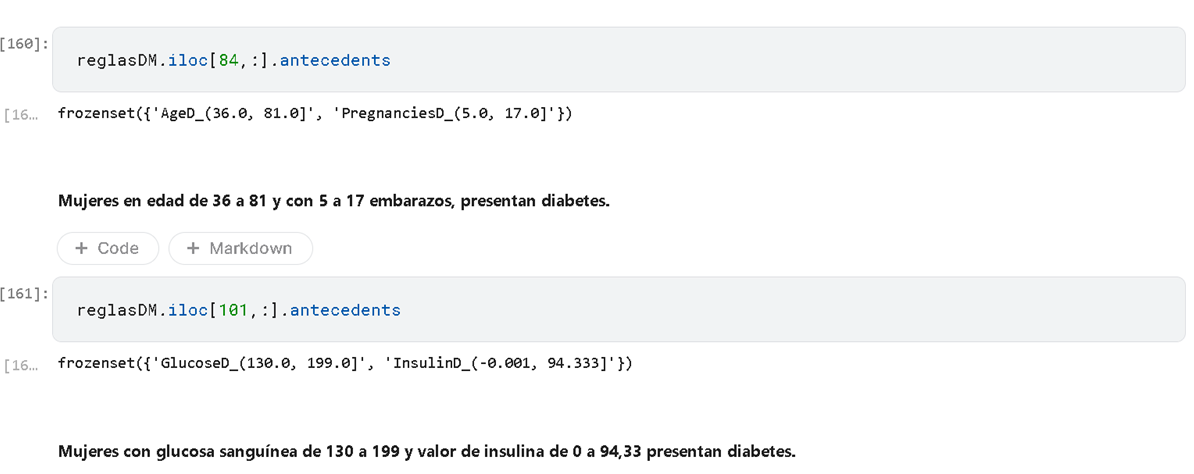

In [ ]:
reglasDM.iloc[106,:].antecedents

**Mujeres con IMC 34 a 67, es decir obesidad, y glucosa sanguínea 130 a 199, presentan diabetes.**

In [ ]:
reglasDM.iloc[108,:].antecedents

**Mujeres de edad 36 a 81 años y glucosa de 130 a 199, presentan diabetes.**

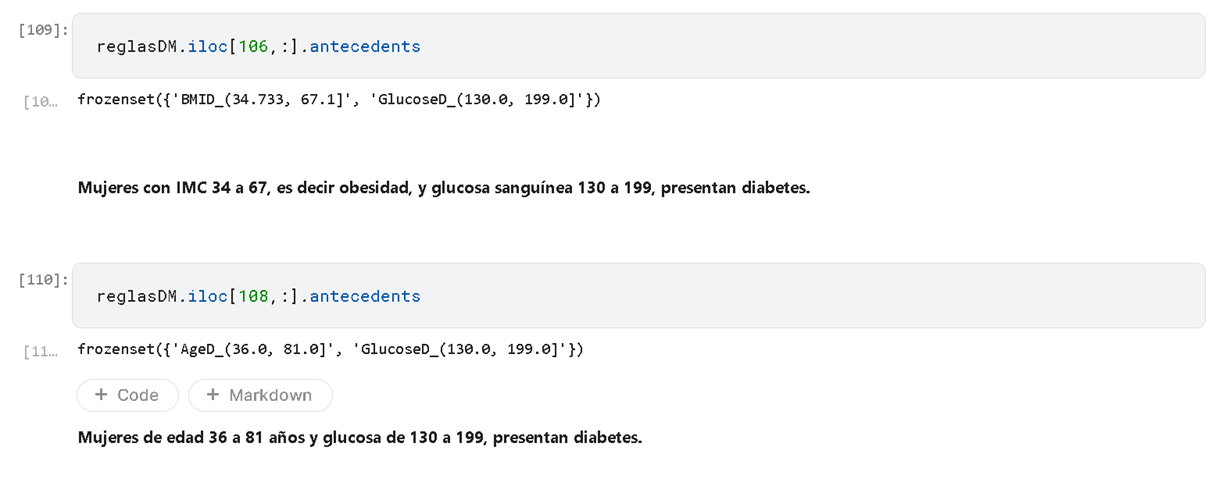

In [ ]:
# Considerar las reglas que tienen 1 o más de lift.
reglasDM=association_rules(freqItemsDM, metric="lift",min_threshold=1)
reglasDM

In [ ]:
reglasDM[reglasDM["consequents"] == {"Outcome"}]

**Discusión de resultados**.

**Se observan resultados que ya fueron presentados anteriormente.**

In [ ]:
reglasDM.iloc[466,:].antecedents

**Esta regla es distinta a las presentadas anteriormente, señalando que mujeres con insulina entre los valores 0 y 94,3 y grosor de la piel de 0 a 13 mm, presentan diabetes**

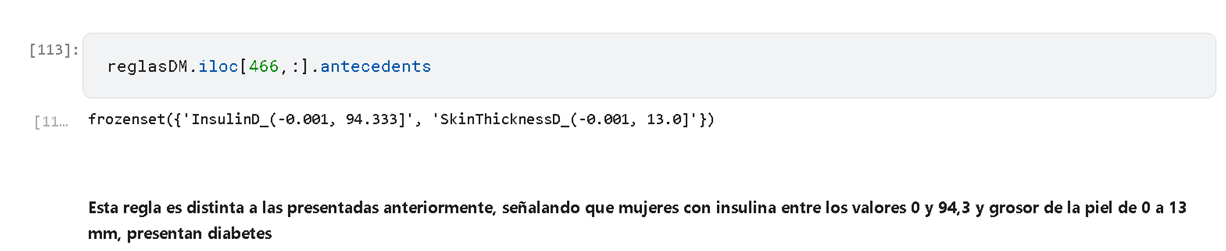

**Resultados en las reglas obtenidas:**

* Mujeres en edad de 36 a 81 y con 5 a 17 embarazos, presentan diabetes.

* Mujeres con glucosa sanguínea de 130 a 199 y valor de insulina de 0 a 94, presentan diabetes.

* Mujeres con IMC 34 a 67, es decir obesidad, y glucosa sanguínea 130 a 199, presentan diabetes.

* Mujeres de edad 36 a 81 años y glucosa de 130 a 199, presentan diabetes.

* Mujeres con insulina entre los valores 0 y 94,3 y grosor de la piel de 0 a 13 mm, presentan diabetes.
